In [19]:
import pandas as pd


df = pd.read_csv("data/preprocessed_train.csv", index_col="id")

In [20]:
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
5,0.594579,-11.715431,0.101701,0.000005,0.259634,0.024300,0.639254,161012.2221,0.938333,151.43602


In [21]:
from sklearn.metrics import root_mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
y = df['BeatsPerMinute']
X = df.drop(columns=['BeatsPerMinute'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [50]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

n = 500

model = xgb.train(
    params, xgb_train, num_boost_round=n, evals=[(xgb_test, "test")], early_stopping_rounds=30
)

[0]	test-rmse:23.29122
[1]	test-rmse:23.29089
[2]	test-rmse:23.28950
[3]	test-rmse:23.28841
[4]	test-rmse:23.28773
[5]	test-rmse:23.28690
[6]	test-rmse:23.28634
[7]	test-rmse:23.28635
[8]	test-rmse:23.28641
[9]	test-rmse:23.28594
[10]	test-rmse:23.28563
[11]	test-rmse:23.28560
[12]	test-rmse:23.28556
[13]	test-rmse:23.28587
[14]	test-rmse:23.28586
[15]	test-rmse:23.28581
[16]	test-rmse:23.28586
[17]	test-rmse:23.28565
[18]	test-rmse:23.28589
[19]	test-rmse:23.28609
[20]	test-rmse:23.28596
[21]	test-rmse:23.28605
[22]	test-rmse:23.28620
[23]	test-rmse:23.28598
[24]	test-rmse:23.28573
[25]	test-rmse:23.28613
[26]	test-rmse:23.28637
[27]	test-rmse:23.28674
[28]	test-rmse:23.28692
[29]	test-rmse:23.28705
[30]	test-rmse:23.28710
[31]	test-rmse:23.28721
[32]	test-rmse:23.28677
[33]	test-rmse:23.28709
[34]	test-rmse:23.28711
[35]	test-rmse:23.28716
[36]	test-rmse:23.28710
[37]	test-rmse:23.28726
[38]	test-rmse:23.28754
[39]	test-rmse:23.28777
[40]	test-rmse:23.28768
[41]	test-rmse:23.28724


In [51]:
preds = model.predict(xgb_test)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.28770198010605
r2 of the model is: 0.0004336332146026578


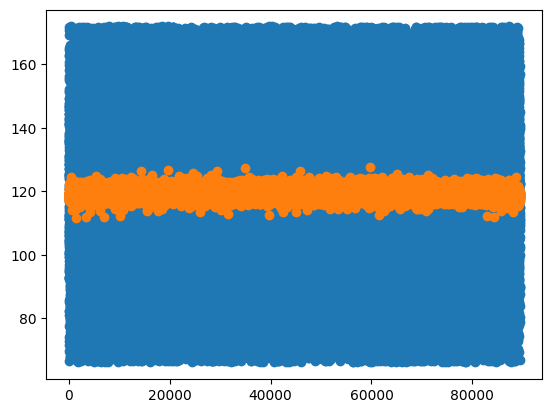

In [52]:
import matplotlib.pyplot as plt



plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [28]:
import numpy as np

preds = np.array([y_train.mean()] * len(y_test))

In [29]:
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the mean is:', rmse)
print('r2 of the mean is:', r2)

rmse of the mean is: 23.292852019483835
r2 of the mean is: -8.520791726418508e-06


In [34]:
import numpy as np

num_bins = 10

hist, bins = np.histogram(df['RhythmScore'], bins=num_bins)

In [36]:
bins

array([0.31946677, 0.38218068, 0.44489459, 0.50760851, 0.57032242,
       0.63303633, 0.69575025, 0.75846416, 0.82117807, 0.88389198,
       0.9466059 ])

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -23.339442134544385


In [13]:
best_model = grid_search.best_estimator_

In [14]:
preds = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.285767605407692
r2 of the model is: 0.0005996827103466051


In [15]:
best_model.feature_importances_

array([0.13685244, 0.06887731, 0.07109366, 0.08081007, 0.05999668,
       0.11260118, 0.24509571, 0.1340483 , 0.09062473], dtype=float32)

In [16]:
X_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
id,,,,,,,,,
24994,0.583060,-9.269429,0.101150,0.053240,0.000001,0.232535,0.379670,344867.5465,0.863867
11129,0.462549,-7.028528,0.136623,0.010928,0.267938,0.341289,0.415446,270144.3437,0.639800
187859,0.703008,-1.357000,0.058488,0.223777,0.000001,0.156637,0.672463,264738.7939,0.737867
154769,0.558958,-12.948542,0.046433,0.392411,0.222384,0.147898,0.603788,221915.9513,0.057867
183606,0.914623,-3.673236,0.023500,0.222965,0.237300,0.079443,0.303056,321783.8640,0.490733


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.to_frame())
y_test_scaled = scaler.fit_transform(y_test.to_frame())

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model objecat
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_subset, y_train_scaled)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -0.9998239051913289


In [35]:
best_model = grid_search.best_estimator_

In [36]:
preds = best_model.predict(X_test_subset)
rmse = root_mean_squared_error(y_test_scaled, preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 0.9997734436760254
r2 of the model is: -25.955522292160364


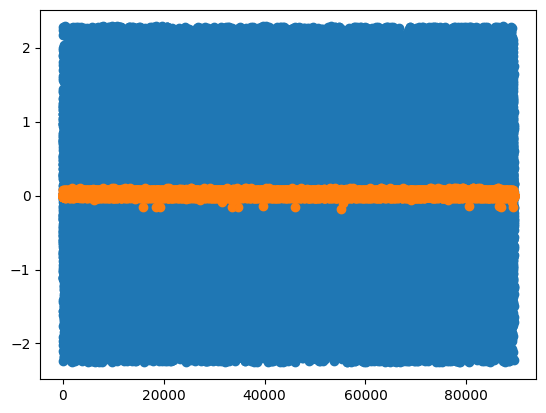

In [37]:
plt.scatter(range(len(y_test_scaled)), y_test_scaled)
plt.scatter(range(len(y_test_scaled)), preds)

In [38]:
X_train

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
id,,,,,,,,,
24994,0.583060,-9.269429,0.101150,0.053240,0.000001,0.232535,0.379670,344867.5465,0.863867
11129,0.462549,-7.028528,0.136623,0.010928,0.267938,0.341289,0.415446,270144.3437,0.639800
187859,0.703008,-1.357000,0.058488,0.223777,0.000001,0.156637,0.672463,264738.7939,0.737867
154769,0.558958,-12.948542,0.046433,0.392411,0.222384,0.147898,0.603788,221915.9513,0.057867
183606,0.914623,-3.673236,0.023500,0.222965,0.237300,0.079443,0.303056,321783.8640,0.490733
...,...,...,...,...,...,...,...,...,...
180126,0.481746,-8.831346,0.023500,0.284871,0.114568,0.113876,0.242246,181351.2715,0.349867
445874,0.666033,-5.471489,0.023500,0.462536,0.333526,0.056027,0.402427,285935.6299,0.367200
223838,0.590220,-1.357000,0.152995,0.086785,0.296954,0.170597,0.978000,141697.8414,0.834267


In [78]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [144]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_

In [145]:
sum(explained_variance)

np.float64(0.42759051493538236)

In [146]:
xgb_model = xgb.XGBRegressor(**{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9})
xgb_model.fit(X_train_reduced, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [147]:
preds = xgb_model.predict(X_test_reduced)
rmse = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.29754265112163
r2 of the model is: -0.0004113176580908817


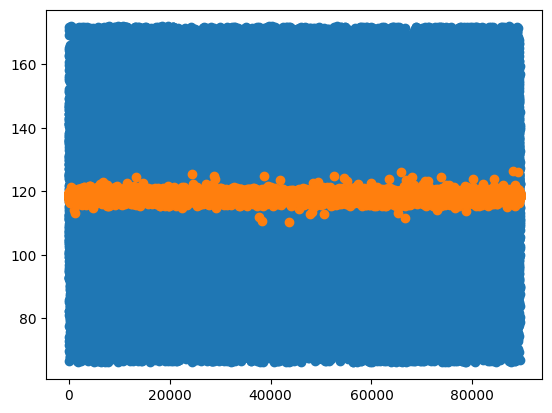

In [148]:
plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

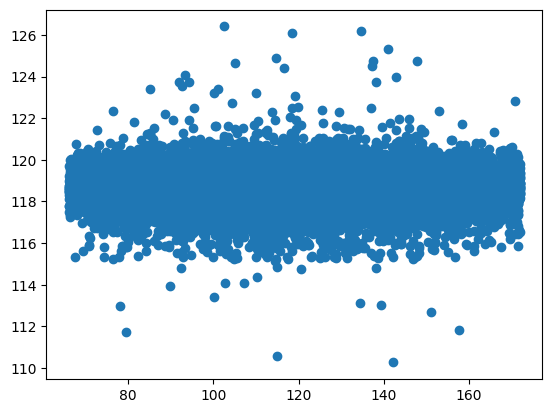

In [149]:
plt.scatter(y_test, preds)

In [60]:
import numpy as np
import pandas as pd
from itertools import combinations
from typing import Dict, Iterable, List, Tuple, Optional

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


# --------------------------
# Helpers for safe transforms
# --------------------------
def _safe_log1p(s: pd.Series) -> pd.Series:
    """log1p with automatic shifting to avoid log of <= -1 values."""
    s = s.astype(float)
    minv = s.min()
    if np.isfinite(minv) and minv <= -1.0:
        shift = (-minv) + 1.0
        return np.log1p(s + shift)
    return np.log1p(s)

def _sqrt01(s: pd.Series) -> pd.Series:
    """sqrt for features expected in [0,1]; clamps into [0,1] before sqrt."""
    return np.sqrt(np.clip(s.astype(float), 0.0, 1.0))

def _square(s: pd.Series) -> pd.Series:
    return s.astype(float) ** 2

def _cube(s: pd.Series) -> pd.Series:
    return s.astype(float) ** 3

def _ratio(a: pd.Series, b: pd.Series, eps: float = 1e-8) -> pd.Series:
    return a.astype(float) / (b.astype(float) + eps)


# --------------------------
# Feature engineering factory
# --------------------------
def make_transforms(
    df: pd.DataFrame,
    *,
    exclude: Iterable[str] = (),
    log_cols: Iterable[str] = (),
    sqrt_cols: Iterable[str] = (),
    square_cols: Iterable[str] = (),
    cube_cols: Iterable[str] = (),
    interactions: Iterable[Tuple[str, str]] = (),
    auto_interactions_from: Iterable[str] = (),
    auto_interactions_k: int = 0,
    ratios: Iterable[Tuple[str, str]] = (),
    auto_ratios_from: Iterable[str] = (),
    auto_ratios_k: int = 0,
    standardize_cols: Iterable[str] = (),
    drop_original: bool = False,
) -> pd.DataFrame:
    """
    Build a transformed design matrix from df with flexible knobs.

    Parameters
    ----------
    exclude : columns to ignore entirely (e.g., the target)
    log_cols/sqrt_cols/square_cols/cube_cols : columns to transform
    interactions : explicit list of pairwise products e.g. [("Energy","RhythmScore")]
    auto_interactions_from : columns to consider for auto pairwise products (all unique pairs)
    auto_interactions_k : if >0, limit to first k pairs (alphabetical order) to keep size in check
    ratios : explicit list of ratios e.g. [("VocalContent","InstrumentalScore")]
    auto_ratios_from : columns to consider for auto pairwise ratios a/b (ordered)
    auto_ratios_k : if >0, limit to first k ordered pairs
    standardize_cols : columns to z-score (done after all creations)
    drop_original : if True, drops originals of transformed columns (keeps others)
    """

    df = df.copy()
    base_cols = [c for c in df.columns if c not in set(exclude)]

    out = df[base_cols].copy()

    # — basic transforms
    for c in log_cols:
        if c in out:
            out[f"{c}_log1p"] = _safe_log1p(out[c])
    for c in sqrt_cols:
        if c in out:
            out[f"{c}_sqrt"] = _sqrt01(out[c])
    for c in square_cols:
        if c in out:
            out[f"{c}_sq"] = _square(out[c])
    for c in cube_cols:
        if c in out:
            out[f"{c}_cu"] = _cube(out[c])

    # — interactions (products)
    for a, b in interactions:
        if a in out and b in out:
            out[f"{a}__x__{b}"] = out[a].astype(float) * out[b].astype(float)

    if len(auto_interactions_from) > 0:
        cand = [c for c in auto_interactions_from if c in out]
        pairs = list(combinations(sorted(cand), 2))
        if auto_interactions_k > 0:
            pairs = pairs[:auto_interactions_k]
        for a, b in pairs:
            out[f"{a}__x__{b}"] = out[a].astype(float) * out[b].astype(float)

    # — ratios
    for a, b in ratios:
        if a in out and b in out:
            out[f"{a}__div__{b}"] = _ratio(out[a], out[b])

    # if auto_ratios_from:
    #     cand = [c for c in auto_ratios_from if c in out]
    #     ordered_pairs = [(a, b) for a in cand for b in cand if a != b]
    #     if auto_ratios_k > 0:
    #         ordered_pairs = ordered_pairs[:auto_ratios_k]
    #     for a, b in ordered_pairs:
    #         out[f"{a}__div__{b}"] = _ratio(out[a], out[b])

    # # — optional standardization (z-score)
    # if standardize_cols:
    #     scaler = StandardScaler(with_mean=True, with_std=True)
    #     cols = [c for c in standardize_cols if c in out]
    #     if cols:
    #         out[cols] = scaler.fit_transform(out[cols])

    # — drop originals if requested
    if drop_original:
        to_drop = set(log_cols) | set(sqrt_cols) | set(square_cols) | set(cube_cols)
        out = out[[c for c in out.columns if c not in to_drop]]

    return out

In [65]:
X_transformed = make_transforms(
    X,
    log_cols=df.columns,
    sqrt_cols=df.columns,
    square_cols=df.columns,
    cube_cols=df.columns,
    auto_interactions_from=df.columns,
    auto_interactions_k=5,
)

In [66]:
X_transformed

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,RhythmScore_log1p,...,InstrumentalScore_cu,LivePerformanceLikelihood_cu,MoodScore_cu,TrackDurationMs_cu,Energy_cu,AcousticQuality__x__AudioLoudness,AcousticQuality__x__Energy,AcousticQuality__x__InstrumentalScore,AcousticQuality__x__LivePerformanceLikelihood,AcousticQuality__x__MoodScore
id,,,,,,,,,,,,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,0.472257,...,1.225043e-18,0.000136,0.068854,2.457000e+16,5.641060e-01,-0.000041,0.000004,5.735200e-12,2.754260e-07,0.000002
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,0.494362,...,4.266009e-02,0.004958,0.275907,4.452996e+15,3.073925e-03,-7.237927,0.064693,1.554646e-01,7.587034e-02,0.289653
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,0.550698,...,4.074322e-03,0.000644,0.021658,1.147703e+16,1.158337e-01,-0.002240,0.000805,2.636671e-04,1.425760e-04,0.000460
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,0.427206,...,1.225043e-18,0.036378,0.109057,9.794943e+15,8.501752e-01,-0.896807,0.065069,7.349505e-08,2.275910e-02,0.032817
5,0.594579,-11.715431,0.101701,0.000005,0.259634,0.024300,0.639254,161012.2221,0.938333,0.466610,...,1.750191e-02,0.000014,0.261229,4.174231e+15,8.261738e-01,-0.000063,0.000005,1.391639e-06,1.302480e-07,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524158,0.813337,-8.740636,0.093817,0.167045,0.167940,0.024300,0.802797,291283.3542,0.547667,0.595169,...,4.736589e-03,0.000014,0.517390,2.471423e+16,1.642665e-01,-1.460078,0.091485,2.805358e-02,4.059190e-03,0.134103
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,0.586025,...,1.225043e-18,0.007013,0.298183,2.489374e+15,8.518400e-08,-6.766345,0.002221,5.400702e-07,9.661411e-02,0.337205
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,0.433701,...,1.225043e-18,0.030933,0.202126,4.101302e+16,3.713849e-01,-0.229303,0.121461,1.808063e-07,5.304418e-02,0.099168


In [145]:
def eval_xgb_regression(
    X: pd.DataFrame,
    y: pd.Series,
    features: list | None = None,
    test_size: float = 0.25,
    random_state: int = 0,
    params: Optional[Dict] = None,
    num_boost_round: int = 1000,
    early_stopping_rounds: int = 50,
) -> Dict[str, float]:
    """Train/validate XGBoost with early stopping; returns metrics and model."""
    if params is None:
        params = {
            "objective": "reg:squarederror",
            "max_depth": 5,
            "learning_rate": 0.1,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "eval_metric": "rmse",
        }

    if features:
        X = X[features]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, "train"), (dtest, "valid")],
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False,
    )

    preds = model.predict(dtest, iteration_range=(0, model.best_iteration + 1))
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    return {
        "rmse": float(rmse),
        "r2": float(r2),
        "best_iteration": int(model.best_iteration),
        "n_features": int(X.shape[1]),
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "preds": preds,
        "model": model
    }

In [146]:
result = eval_xgb_regression(
    X=X_transformed,
    y=y
)

In [147]:
model = result["model"]

In [148]:
importance = model.get_score(importance_type="weight")

In [149]:
best_weight = dict(filter(lambda x: x[1] > 100, reversed(sorted(importance.items(), key=lambda x: x[1])))).keys()

In [150]:
importance = model.get_score(importance_type="gain")

In [151]:
best_gain = dict(filter(lambda x: x[1] > 4000, reversed(sorted(importance.items(), key=lambda x: x[1])))).keys()

In [160]:
best_features = list(set(list(best_weight) + list(best_gain)))

In [196]:
result = eval_xgb_regression(
    X=X_transformed[best_features],
    y=y,
    params={
        "objective": "reg:squarederror",
        "max_depth": 3,
        "learning_rate": 0.1,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "eval_metric": "rmse",
    }
)

In [197]:
result['rmse']

23.28447584179119

In [198]:
result['r2']

0.000710561868952464

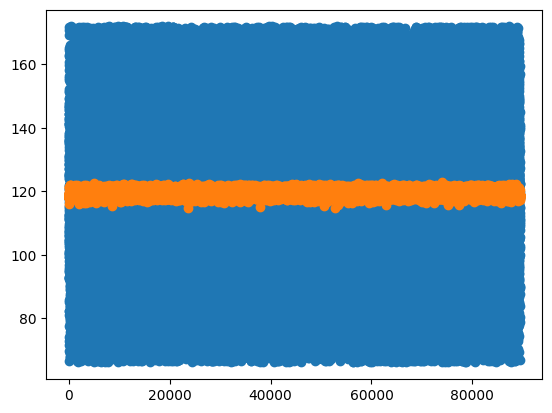

In [199]:
preds = result['preds']

plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [203]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed[best_features], y, test_size=0.25, random_state=0)

# Stage 1 baseline = mean
baseline_pred = np.full_like(y_train, y_train.mean(), dtype=float)

# Residuals
residuals = y_train - baseline_pred

# Stage 2: model residuals
dtrain = xgb.DMatrix(X_train, residuals)
dtest  = xgb.DMatrix(X_test)

params = {"objective": "reg:squarederror", "max_depth": 5, "learning_rate": 0.1}
resid_model = xgb.train(params, dtrain, num_boost_round=300)

# Predictions = baseline + residual correction
resid_preds = y_test.mean() + resid_model.predict(dtest)

print("RMSE:", root_mean_squared_error(y_test, resid_preds))
print("R²:", r2_score(y_test, resid_preds))

RMSE: 23.3239016470031
R²: -0.0026763424036304606


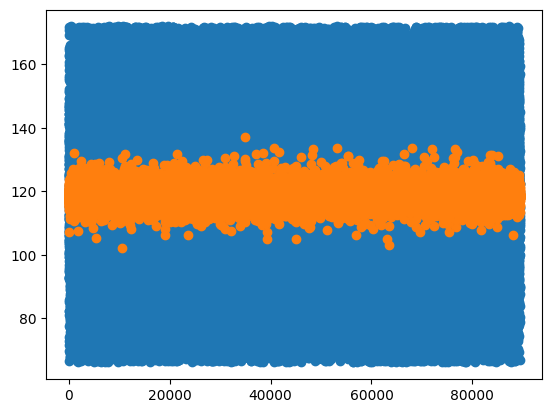

In [206]:
preds = result['preds']

plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), resid_preds)